Page Rank Calculation

In [13]:
import networkx as nx
import scipy 
import matplotlib.pyplot as plt


In [2]:
# creation of directional graph
g  = nx.DiGraph()

In [3]:
# adding edges
edge_list = [(1,2),(1,3),(2,1),(3,1),(3,2)]
g.add_edges_from(edge_list)

In [4]:
pagerank = nx.pagerank(g)

In [5]:
print("PageRank of nodes:")
for nodes,score in pagerank.items():
    print(f"Node {nodes} : {score}")

PageRank of nodes:
Node 1 : 0.43274880303664615
Node 2 : 0.33333333333333326
Node 3 : 0.23391786363002037


In [6]:
from pylab import rcParams # for setting plot size
rcParams['figure.figsize'] = (3,3) 

In [9]:
labels = ['A','B','C','D','E','F','G']
pages = range(len(labels))

In [11]:
page_labels = dict(zip(pages,labels)) # mapping page number to label
page_labels

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}

In [12]:
links = [(1,0), (2,0), (3,1), (3,2), (4,1), (4,2), (5,3), (5,4), (6,3), (6,4), (6,5)]

In [ ]:
positions = [(0,1), (1,2), (1,0), (2,0), (2,1), (3,2), (3,1)]

In [14]:
G = nx.DiGraph()
G.add_nodes_from(pages)
G.add_edges_from(links)

None

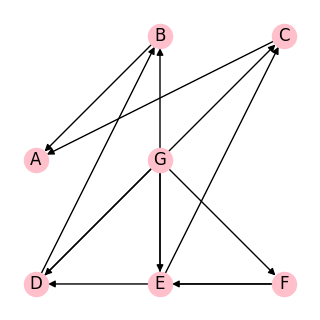

In [16]:
plt.clf() # clear current figure
display(nx.draw(G,
                with_labels=True,
                labels=page_labels,
                node_color='pink',
                font_color='black',
                pos=positions))

In [17]:
page_rank = nx.pagerank(G)
page_rank

{0: 0.32591992700965544,
 1: 0.1558318053265522,
 2: 0.1558318053265522,
 3: 0.11156152649727744,
 4: 0.11156152649727744,
 5: 0.07828892263154488,
 6: 0.061004486711140324}

In [19]:
# to find most important node
for node,rank in page_rank.items():
    if rank == max(page_rank.values()):
        print(f"Most important node is {node} with rank {rank}")

Most important node is 0 with rank 0.32591992700965544


In [27]:
# adjacency array
adjacency = nx.to_dict_of_lists(G)
adjacency

{0: [], 1: [0], 2: [0], 3: [1, 2], 4: [1, 2], 5: [3, 4], 6: [3, 4, 5]}

In [28]:
# transition matrix
connection_matrix = []
for a in adjacency:
    for b in adjacency[a]:
        connection_matrix.append((b,a,1/len(adjacency[int(a)])))
connection_matrix

[(0, 1, 1.0),
 (0, 2, 1.0),
 (1, 3, 0.5),
 (2, 3, 0.5),
 (1, 4, 0.5),
 (2, 4, 0.5),
 (3, 5, 0.5),
 (4, 5, 0.5),
 (3, 6, 0.3333333333333333),
 (4, 6, 0.3333333333333333),
 (5, 6, 0.3333333333333333)]

In [30]:
import numpy as np
n = len(pages)
page_rank_ = np.ones(n)/n
old_page_rank = np.ones(n)
print(page_rank_)
print(old_page_rank)

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[1. 1. 1. 1. 1. 1. 1.]


In [31]:
def distance(u,v):
    if len(u) != len(v):
        raise ValueError("Vectors must be of equal length")
    
    return sum([(v-u)**2 for u,v in zip(u,v)])

In [ ]:
linksRDD = sc.parallelize(connection_matrix).cache()
linksRDD.take(3)

In [ ]:
# main algorithm
tolerence = 10e-7
max_iteration = 1000
iteration =0
while (distance(page_rank_,old_page_rank)>tolerence and iteration < max_iteration):
    old_page_rank = page_rank_
    page_rank_values = linksRDD.map(lamba x:
                                    (x[0],x[2]*page_rank_[x[1]])).reduceByKey(lambda x,y:x+y).sortByKey().collect()
    page_rank_ = np.array([c for (i,c) in page_rank_values])
    iteration +=1
    print(f"Iteration {iteration} : {page_rank_}")
    # return page_rank